## Part 1: Fundamentals

### Fundamental terms in portfolio optimization 
- (notes from https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#optimal-risky-portfolio)

There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.

We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [103]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# input 1: Tickers

In [104]:
# Create a list of tickers
tickers = [
'TSLA',
'AAPL',
'MSFT',
'ARKK',
'AMZN',
'GOOG',
'NFLX', 
'NVDA',
'FB',
'SPY',
'IWM',
'BABA',
'V',
'VOO',
'ARKQ',
'ETH-USD', 
'BTC-USD', 
'MIDAS-USD', 
'DOGE-USD', 
'AVAX-USD', 
'DOT-USD', 
'MATIC-USD']
### Input start and end date variables and assign dates 
startDate='2015/01/01'
endDate='2022/10/31'

 


### Building an optimal risky portfolio

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

# input 2: Start and end dates

In [79]:
### Import data ###
df = data.DataReader(tickers, 'yahoo', start=startDate, end=endDate)
df.head()

Attributes  Adj Close                                                       \
Symbols          TSLA       AAPL       MSFT       ARKK     AMZN       GOOG   
Date                                                                         
2015-01-01        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-02  14.620667  24.644022  40.926445  18.353802  15.4260  26.168653   
2015-01-03        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-04        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-05  14.006000  23.949759  40.550098  17.911564  15.1095  25.623152   

Attributes                                       ...      Volume             \
Symbols          NFLX      NVDA  FB         SPY  ...           V        VOO   
Date                                             ...                          
2015-01-01        NaN       NaN NaN         NaN  ...         NaN        NaN   
2015-01-02  49.848572  4.836186 NaN  178.278519  ...   8389600.0  1865000.0   
2015-01-03        NaN       NaN NaN         NaN  ...         NaN        NaN   
2015-01-04        NaN       NaN NaN         NaN  ...         NaN        NaN   
2015-01-05  47.311428  4.754503 NaN  175.058868  ...  12751200.0  2734700.0   

Attributes                                                                  \
Symbols       ARKQ ETH-USD     BTC-USD MIDAS-USD DOGE-USD AVAX-USD DOT-USD   
Date                                                                         
2015-01-01     NaN     NaN   8036550.0       NaN      NaN      NaN     NaN   
2015-01-02  1200.0     NaN   7860650.0       NaN      NaN      NaN     NaN   
2015-01-03     NaN     NaN  33054400.0       NaN      NaN      NaN     NaN   
2015-01-04     NaN     NaN  55629100.0       NaN      NaN      NaN     NaN   
2015-01-05  1300.0     NaN  43962800.0       NaN      NaN      NaN     NaN   

Attributes            
Symbols    MATIC-USD  
Date                  
2015-01-01       NaN  
2015-01-02       NaN  
2015-01-03       NaN  
2015-01-04       NaN  
2015-01-05       NaN  

[5 rows x 132 columns]

In [80]:
### Send full df to csv to look at ###
df.to_csv('fulldf.csv')

In [81]:
# Closing price
df = df['Adj Close']
df.head()


Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,...,V,VOO,ARKQ,ETH-USD,BTC-USD,MIDAS-USD,DOGE-USD,AVAX-USD,DOT-USD,MATIC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,314.248993,NaN,NaN,NaN,NaN,NaN
2015-01-02,14.620667,24.644022,40.926445,18.353802,15.4260,26.168653,49.848572,4.836186,NaN,178.278519,...,62.883438,163.051819,18.318113,NaN,315.032013,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,281.082001,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,264.195007,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.006000,23.949759,40.550098,17.911564,15.1095,25.623152,47.311428,4.754503,NaN,175.058868,...,61.495346,160.187164,17.795807,NaN,274.473999,NaN,NaN,NaN,NaN,NaN


### Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [82]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,...,V,VOO,ARKQ,ETH-USD,BTC-USD,MIDAS-USD,DOGE-USD,AVAX-USD,DOT-USD,MATIC-USD
Symbols,,,,,,,,,,,,,,,,,,,,,
TSLA,0.000864,0.000198,0.000186,0.000349,0.000203,0.000167,0.000248,0.000314,0.000450,0.000135,...,0.000145,0.000136,0.000283,0.000293,0.000158,0.000413,0.000184,0.000572,0.000562,0.000572
AAPL,0.000198,0.000242,0.000161,0.000180,0.000154,0.000144,0.000157,0.000225,0.000334,0.000115,...,0.000125,0.000116,0.000145,0.000203,0.000096,0.000268,0.000146,0.000254,0.000275,0.000287
MSFT,0.000186,0.000161,0.000214,0.000177,0.000165,0.000161,0.000164,0.000229,0.000349,0.000115,...,0.000133,0.000117,0.000138,0.000207,0.000101,0.000230,0.000183,0.000245,0.000279,0.000331
ARKK,0.000349,0.000180,0.000177,0.000381,0.000196,0.000169,0.000249,0.000315,0.000675,0.000133,...,0.000142,0.000134,0.000253,0.000340,0.000187,0.000470,0.000289,0.000601,0.000565,0.000553
AMZN,0.000203,0.000154,0.000165,0.000196,0.000294,0.000165,0.000221,0.000227,0.000502,0.000104,...,0.000114,0.000104,0.000145,0.000196,0.000090,0.000258,0.000163,0.000310,0.000349,0.000304
GOOG,0.000167,0.000144,0.000161,0.000169,0.000165,0.000214,0.000168,0.000208,0.000420,0.000106,...,0.000122,0.000107,0.000135,0.000190,0.000088,0.000183,0.000163,0.000235,0.000289,0.000275
NFLX,0.000248,0.000157,0.000164,0.000249,0.000221,0.000168,0.000587,0.000258,0.000663,0.000110,...,0.000118,0.000111,0.000171,0.000227,0.000113,0.000218,0.000224,0.000401,0.000400,0.000354
NVDA,0.000314,0.000225,0.000229,0.000315,0.000227,0.000208,0.000258,0.000618,0.000617,0.000157,...,0.000175,0.000159,0.000247,0.000333,0.000172,0.000382,0.000293,0.000548,0.000544,0.000502
FB,0.000450,0.000334,0.000349,0.000675,0.000502,0.000420,0.000663,0.000617,0.001158,0.000256,...,0.000227,0.000255,0.000411,0.000463,0.000362,0.000352,0.000337,0.000516,0.000491,0.000482


The covariance between two stocks is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [83]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,...,V,VOO,ARKQ,ETH-USD,BTC-USD,MIDAS-USD,DOGE-USD,AVAX-USD,DOT-USD,MATIC-USD
Symbols,,,,,,,,,,,,,,,,,,,,,
TSLA,1.000000,0.432697,0.431770,0.609201,0.402464,0.388653,0.348467,0.429373,0.389218,0.472937,...,0.362883,0.470275,0.660585,0.168938,0.137690,0.130133,0.069437,0.230919,0.249620,0.189245
AAPL,0.432697,1.000000,0.706369,0.594576,0.577775,0.632882,0.415619,0.581797,0.555354,0.758941,...,0.589654,0.758254,0.640186,0.229372,0.157812,0.166684,0.107650,0.202220,0.242609,0.185846
MSFT,0.431770,0.706369,1.000000,0.619715,0.660410,0.751424,0.464130,0.629453,0.588370,0.811402,...,0.671151,0.812361,0.650300,0.251953,0.177935,0.152646,0.145407,0.219588,0.274307,0.230866
ARKK,0.609201,0.594576,0.619715,1.000000,0.587014,0.592448,0.527572,0.649160,0.581162,0.702870,...,0.535020,0.699580,0.890109,0.286854,0.245893,0.203313,0.159108,0.300924,0.303610,0.254328
AMZN,0.402464,0.577775,0.660410,0.587014,1.000000,0.659502,0.532232,0.533631,0.595183,0.623286,...,0.487330,0.619521,0.580775,0.208144,0.134868,0.153682,0.113110,0.211949,0.259181,0.191581
GOOG,0.388653,0.632882,0.751424,0.592448,0.659502,1.000000,0.473670,0.571651,0.652860,0.748792,...,0.612586,0.746538,0.632210,0.230323,0.154938,0.123726,0.128646,0.197974,0.261990,0.190786
NFLX,0.348467,0.415619,0.464130,0.527572,0.532232,0.473670,1.000000,0.428944,0.512483,0.468618,...,0.358887,0.466063,0.485973,0.173517,0.119813,0.092322,0.112021,0.188818,0.201816,0.157340
NVDA,0.429373,0.581797,0.629453,0.649160,0.533631,0.571651,0.428944,1.000000,0.547950,0.651502,...,0.517617,0.649909,0.682598,0.240892,0.177237,0.157474,0.138572,0.272978,0.291212,0.216002
FB,0.389218,0.555354,0.588370,0.581162,0.595183,0.652860,0.512483,0.547950,1.000000,0.620530,...,0.410337,0.621124,0.584236,0.309571,0.317163,0.122552,0.191328,0.244422,0.284592,0.237374


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## Part 2

###  Portfolio Variance
The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

###  Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [84]:
### Yearly returns for individual companies ###
ind_er = df.resample('Y').last().pct_change().mean()
### Only keeping the 10 assets with the highest returns ###
ind_er = ind_er.nlargest(12)
ind_er


Symbols
MATIC-USD    47.313462
AVAX-USD     16.509550
DOGE-USD      7.137211
MIDAS-USD     5.247758
BTC-USD       2.597767
ETH-USD       1.452165
TSLA          1.178731
NVDA          0.783966
DOT-USD       0.558830
AAPL          0.354542
MSFT          0.283778
ARKK          0.276728
dtype: float64

In [85]:
### Update the tickers variable with the assets minus the least profitable ones ###
tickers=ind_er.index.array
tickers


<PandasArray>
['MATIC-USD',  'AVAX-USD',  'DOGE-USD', 'MIDAS-USD',   'BTC-USD',   'ETH-USD',
      'TSLA',      'NVDA',   'DOT-USD',      'AAPL',      'MSFT',      'ARKK']
Length: 12, dtype: object

In [86]:
### Update the df with only the assets we are keeping ###

df=df[tickers]
df

Symbols,MATIC-USD,AVAX-USD,DOGE-USD,MIDAS-USD,BTC-USD,ETH-USD,TSLA,NVDA,DOT-USD,AAPL,MSFT,ARKK
Date,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,314.248993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,315.032013,NaN,14.620667,4.836186,NaN,24.644022,40.926445,18.353802
2015-01-03,NaN,NaN,NaN,NaN,281.082001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,264.195007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,274.473999,NaN,14.006000,4.754503,NaN,23.949759,40.550098,17.911564
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-29,0.933811,18.307974,0.121603,40.394058,20818.476562,1619.698486,NaN,NaN,6.633760,NaN,NaN,NaN
2022-10-30,0.908851,18.265606,0.117802,41.139641,20635.603516,1590.783325,NaN,NaN,6.652473,NaN,NaN,NaN
2022-10-31,0.903988,19.311609,0.127026,41.679581,20495.773438,1572.714478,227.539993,134.970001,6.630904,153.339996,232.130005,38.279999


In [87]:
### Update cov_matrix with new df subtracting the undesirable columns (this step should not be necessary if written properly) ###
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()


In [88]:
### Dynamic list of weights based on the number of assets in the ind_er dataframe ###

w = []
w_num = 1/ind_er.count()
for i in range(0, ind_er.count()): 
    w.append(w_num)
print(w)


[0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333]


In [89]:
# Portfolio returns
port_er = (w*ind_er).sum()
port_er

6.974540643054501

Plotting the efficient frontier
This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [90]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))


In [91]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']



### Plot the graph of efficient frontier. A loop is necessary. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

### We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [92]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [93]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [94]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [95]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MATIC-USD weight,AVAX-USD weight,DOGE-USD weight,MIDAS-USD weight,BTC-USD weight,ETH-USD weight,TSLA weight,NVDA weight,DOT-USD weight,AAPL weight,MSFT weight,ARKK weight
0,8.785241,0.572092,0.135280,0.018182,0.141655,0.095884,0.077583,0.099736,0.040366,0.086932,0.077503,0.019600,0.081261,0.126017
1,7.266181,0.580658,0.092661,0.063138,0.062877,0.140155,0.109034,0.071114,0.053513,0.091164,0.134263,0.113257,0.016519,0.052304
2,5.348034,0.510264,0.021553,0.146381,0.126889,0.062892,0.128578,0.092661,0.061948,0.040224,0.026893,0.076163,0.146350,0.069468
3,6.116044,0.556229,0.059110,0.115145,0.003794,0.175617,0.042875,0.011141,0.103019,0.052497,0.165283,0.148375,0.072380,0.050764
4,8.068942,0.532764,0.122503,0.046162,0.109941,0.009136,0.127245,0.047936,0.061355,0.065248,0.133082,0.032063,0.131485,0.113845


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

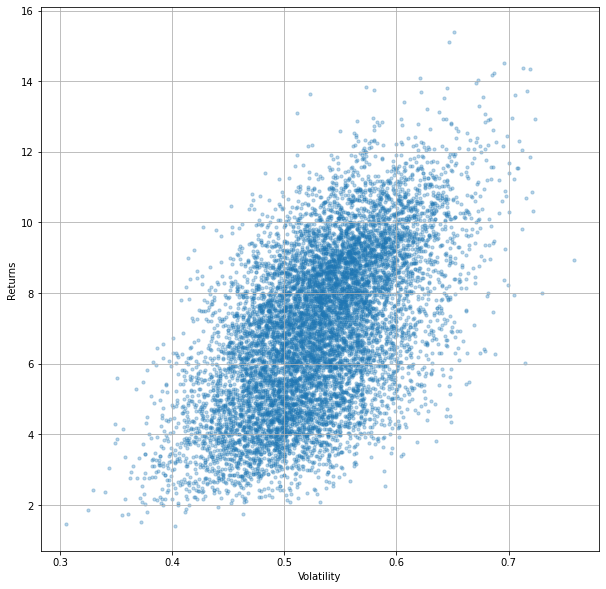

In [96]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier?
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [97]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns             1.450892
Volatility          0.305564
MATIC-USD weight    0.002486
AVAX-USD weight     0.012772
DOGE-USD weight     0.015399
MIDAS-USD weight    0.033343
BTC-USD weight      0.179714
ETH-USD weight      0.016816
TSLA weight         0.017509
NVDA weight         0.195688
DOT-USD weight      0.033913
AAPL weight         0.205198
MSFT weight         0.145687
ARKK weight         0.141475
Name: 1052, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

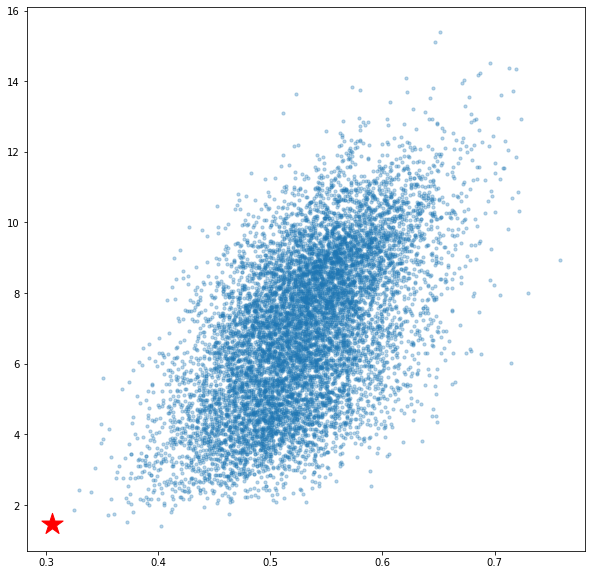

In [98]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

### The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?
This is done by using a parameter called the Sharpe Ratio.

Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

![sharpe formula](image/Sharpe-Ratio-300x149.jpg)





## Part 3: Optimal Risky Portfolio
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [110]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port.to_csv('optimal_portfolio.csv')
optimal_risky_port


Returns             13.624416
Volatility           0.523003
MATIC-USD weight     0.254465
AVAX-USD weight      0.026262
DOGE-USD weight      0.106474
MIDAS-USD weight     0.005579
BTC-USD weight       0.034082
ETH-USD weight       0.000107
TSLA weight          0.058656
NVDA weight          0.071520
DOT-USD weight       0.032913
AAPL weight          0.204769
MSFT weight          0.051669
ARKK weight          0.153504
Name: 2960, dtype: float64

In [113]:
# sort the assets by their weights in the optimal portfolio in deceasing order
sorted_weights = optimal_risky_port.drop(['Returns', 'Volatility']).sort_values(ascending=False)
sorted_weights

MATIC-USD weight    0.254465
AAPL weight         0.204769
ARKK weight         0.153504
DOGE-USD weight     0.106474
NVDA weight         0.071520
TSLA weight         0.058656
MSFT weight         0.051669
BTC-USD weight      0.034082
DOT-USD weight      0.032913
AVAX-USD weight     0.026262
MIDAS-USD weight    0.005579
ETH-USD weight      0.000107
Name: 2960, dtype: float64

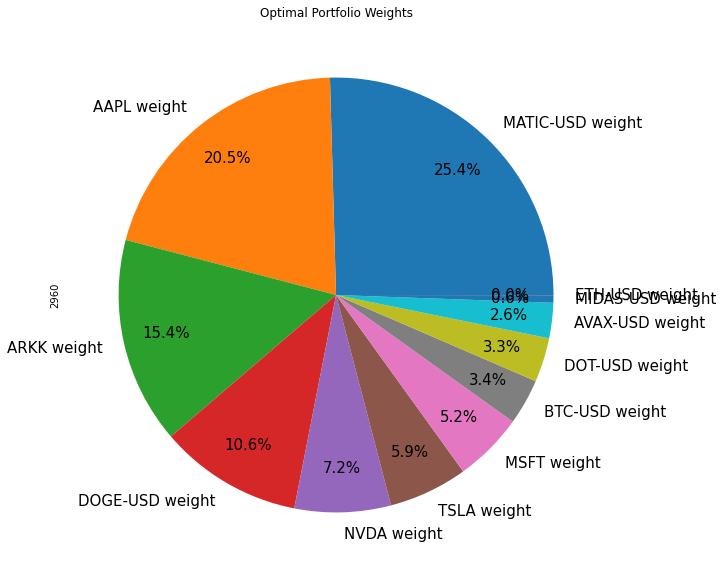

In [115]:
# Create a pie chart of the weights of the assets in the optimal portfolio
plt.sorted_weights = sorted_weights.plot.pie(figsize=[10,10], title='Optimal Portfolio Weights', fontsize=15, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)

In [116]:
# Create a for loop to determine the optimal number of assets to include in the portfolio
# This will be done by creating a list of the number of assets to include in the portfolio
# and then creating a for loop that will run through the list and create a portfolio for each number of assets
# in the list. The portfolio with the highest return will be selected as the optimal portfolio.


# Create a list of the number of assets to include in the portfolio
num_assets_list = []
for i in range(1, len(tickers)+1):
    num_assets_list.append(i)
print(num_assets_list)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

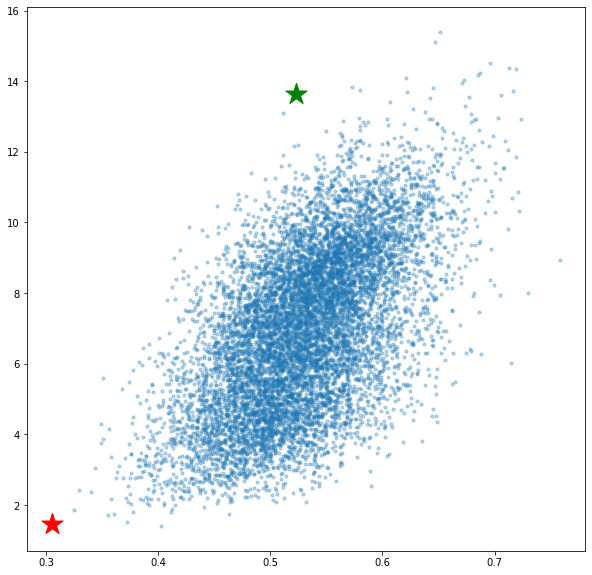

In [100]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

References
- Video series by Finquest (https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
- Investopedia (https://www.investopedia.com/terms/p/portfoliomanagement.asp)